In [1]:
from openff.qcsubmit.results import TorsionDriveCollectionResult
from openff.bespokefit.workflow import WorkflowFactory
from openff.bespokefit.optimizers import ForceBalanceOptimizer
from openff.bespokefit.targets import TorsionProfile_SMIRNOFF
from qcfractal.interface import FractalClient

In [2]:
# build the fitting schema
workflow = WorkflowFactory(initial_forcefield="openff_unconstrained-1.3.0.offxml")

In [3]:
# build the optimizer and settings
fb = ForceBalanceOptimizer()
fb.dict()

{'optimizer_name': 'ForceBalanceOptimizer',
 'optimizer_description': 'A systematic force field optimization tool: https://github.com/leeping/forcebalance',
 'optimization_targets': [],
 'penalty_type': 'L1',
 'job_type': 'optimize',
 'max_iterations': 10,
 'convergence_step_criteria': 0.01,
 'convergence_objective_criteria': 0.01,
 'convergence_gradient_criteria': 0.01,
 'n_criteria': 2,
 'eig_lowerbound': 0.01,
 'finite_difference_h': 0.01,
 'penalty_additive': 1.0,
 'constrain_charge': False,
 'initial_trust_radius': -0.25,
 'minimum_trust_radius': 0.05,
 'error_tolerance': 1.0,
 'adaptive_factor': 0.2,
 'adaptive_damping': 1.0,
 'normalize_weights': False,
 'extras': {}}

In [4]:
# make a target, the settings should be fine
target = TorsionProfile_SMIRNOFF()

In [5]:
# put these in the workflow
fb.set_optimization_target(target=target)
workflow.set_optimizer(optimizer=fb)
# you can see in the settings proper torsions are being targeted with bespoke smirks.
workflow.dict()

{'initial_forcefield': 'openff_unconstrained-1.3.0.offxml',
 'expand_torsion_terms': True,
 'generate_bespoke_terms': True,
 'optimizer': {'optimizer_name': 'ForceBalanceOptimizer',
  'optimizer_description': 'A systematic force field optimization tool: https://github.com/leeping/forcebalance',
  'optimization_targets': [{'name': 'TorsionProfile_SMIRNOFF',
    'description': 'Single point energy and gradient fitting with constrained relaxation, for torsiondrives only.',
    'collection_workflow': 'torsion1d',
    'target_conformers': 4,
    'keywords': {'writelevel': 2,
     'mol2': 'molecule.mol2',
     'pdb': 'molecule.pdb',
     'coords': 'scan.xyz',
     'attenuate': None,
     'energy_denom': 1.0,
     'energy_upper': 10.0,
     'openmm_platform': 'Reference'},
    'weight': 1.0,
    'qc_spec': {'method': 'B3LYP-D3BJ',
     'basis': 'DZVP',
     'program': 'psi4',
     'spec_name': 'default',
     'spec_description': 'Standard OpenFF optimization quantum chemistry specification.',

In [6]:
# connect to qcarchive and get the name of the dataset
client = FractalClient()
client.list_collections("torsiondrivedataset")

tagline
collection          name                                                                                                 
TorsionDriveDataset Fragment Stability Benchmark                                                                     None
                    Fragmenter paper                                                                                 None
                    OpenFF DANCE 1 eMolecules t142 v1.0                                                              None
                    OpenFF Fragmenter Validation 1.0                                                                 None
                    OpenFF Full TorsionDrive Benchmark 1                                                             None
                    OpenFF Gen 2 Torsion Set 1 Roche                                                                 None
                    OpenFF Gen 2 Torsion Set 1 Roche 2                                                               None
                    OpenFF Gen 2 Torsion Set 2 Coverage                                                              None
                    OpenFF Gen 2 Torsion Set 2 Coverage 2                                                            None
                    OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy                                                    None
                    OpenFF Gen 2 Torsion Set 3 Pfizer Discrepancy 2                                                  None
                    OpenFF Gen 2 Torsion Set 4 eMolecules Discrepancy                                                None
                    OpenFF Gen 2 Torsion Set 4 eMolecules Discrepan...                                               None
                    OpenFF Gen 2 Torsion Set 5 Bayer                                                                 None
                    OpenFF Gen 2 Torsion Set 5 Bayer 2                                                               None
                    OpenFF Gen 2 Torsion Set 6 Supplemental                                                          None
                    OpenFF Gen 2 Torsion Set 6 Supplemental 2                                                        None
                    OpenFF Group1 Torsions                                                                           None
                    OpenFF Group1 Torsions 2                                                                         None
                    OpenFF Group1 Torsions 3                                                                         None
                    OpenFF Primary Benchmark 1 Torsion Set                                                           None
                    OpenFF Primary Benchmark 2 Torsion Set                                                           None
                    OpenFF Primary TorsionDrive Benchmark 1                                                          None
                    OpenFF Protein Fragments TorsionDrives v1.0         Torsiondrives for selected dihedrals of variou...
                    OpenFF Rowley Biaryl v1.0                                          Torsiondrives of biaryl molecules.
                    OpenFF Substituted Phenyl Set 1                                                                  None
                    OpenFF Substituted Phenyl Set 1 v2.0                Torsiondrives for selected dihedrals of variou...
                    OpenFF Theory Benchmarking Set B3LYP-D3BJ 6-31+Gss  Torsiondrives for benchmarking B3LYP-D3BJ/6-31...
                    OpenFF Theory Benchmarking Set B3LYP-D3BJ DZVP ...     Torsiondrives for benchmarking B3LYP-D3BJ/DZVP
                    OpenFF Theory Benchmarking Set B3LYP-D3BJ def2-...  Torsiondrives for benchmarking B3LYP-D3BJ/def2...
                    OpenFF Theory Benchmarking Set B3LYP-D3BJ def2-...  Torsiondrives for benchmarking B3LYP-D3BJ/def2...
                    OpenFF Theory Benchmarking Set B3LYP-D3BJ def2-...  Torsiondrives fo

In [7]:
# lets pull down the rowley biaryl set
# note only complete optimizations will be collected
results = TorsionDriveCollectionResult.from_server(client=client, spec_name="default", dataset_name="OpenFF Rowley Biaryl v1.0", final_molecule_only=True)

requested optimizations 2088
requested molecules 2088
requested results 2088


In [10]:
# now we can make the fitting schema from the results
schema = workflow.fitting_schema_from_results(results=results, combine=False)

Building Fitting Schema : 100%|█████████████████| 87/87 [00:06<00:00, 13.69it/s]


In [11]:
# we have found 87 unqiue torsiondrives 
schema.n_molecules

87

In [15]:
# each task has smirks that will be fit
# the atoms are the atoms that will be hit in the molecule
# Note the terms have been expanded to k4 if you do not want this see the workflow options
schema.tasks[0].target_smirks

[TorsionSmirks(atoms={(7, 8, 9, 11)}, smirks='[#6aH1X3x2r6+0:1](-!@[#1AH0X1x0!r+0])(:@[#7aH0X2x2r6+0]):@[#6aH0X3x2r6+0:2](:@[#6aH1X3x2r6+0])-!@[#6aH0X3x2r6+0:3](:@[#6aH1X3x2r6+0]):@[#7aH0X2x2r6+0:4]:@[#6aH1X3x2r6+0]', type=<SmirksType.ProperTorsions: 'ProperTorsions'>, parameterize=set(), terms={'2': TorsionTerm(periodicity='2', phase='180.0 * degree', k='1.048715180139 * mole**-1 * kilocalorie', idivf='1'), '1': TorsionTerm(periodicity='1', phase='0 * degree', k='1e-06 * mole**-1 * kilocalorie', idivf='1.0'), '3': TorsionTerm(periodicity='3', phase='0 * degree', k='1e-06 * mole**-1 * kilocalorie', idivf='1.0'), '4': TorsionTerm(periodicity='4', phase='180 * degree', k='1e-06 * mole**-1 * kilocalorie', idivf='1.0')}),
 TorsionSmirks(atoms={(7, 8, 9, 4)}, smirks='[#6aH1X3x2r6+0:1](-!@[#1AH0X1x0!r+0])(:@[#7aH0X2x2r6+0]):@[#6aH0X3x2r6+0:2](:@[#6aH1X3x2r6+0])-!@[#6aH0X3x2r6+0:3](:@[#7aH0X2x2r6+0]):@[#6aH1X3x2r6+0:4](-!@[#1AH0X1x0!r+0]):@[#6aH1X3x2r6+0]', type=<SmirksType.ProperTorsions: 'P

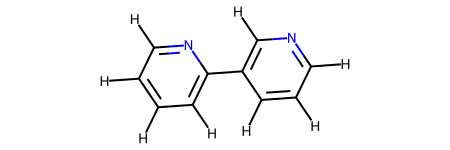

In [16]:
# we can inspect the molecule
# there are 4 dihedrals for this molecules as the smirks encode 1 extra layer out from 
# the target atoms
schema.tasks[0].target_molecule.molecule

In [17]:
# save the schema to file make sure to compress 
schema.export_schema("rowley.json.xz")